In [1]:
import altair as alt
import pandas as pd
import numpy as np
from random import choice



In [72]:
df_network = pd.read_csv('Symology network definition.csv')
df_network.head()

Section Reference  Class Road Type  Region  Site     Address 1  Link Id  \
0       241A_001.00      9        S2     216    47    GOLF LINKS      NaN   
1       241A_002.00      9        NC     216    47    GOLF LINKS      NaN   
2        A10_001.00      6        S1     123    37  STATION ROAD      NaN   
3        A10_002.00      6        S2     123    37  STATION ROAD      NaN   
4        A10_003.00      6        S2     123     2    COAST ROAD      NaN   

   From Node  To Node  Section Id Urban/Rural   From      To  From Easting  \
0      11138    11421        1566       Rural   0.00   56.50     219926.00   
1      11421    11422        1567       Rural  56.50   94.16     219919.00   
2      10041    10029         926       Rural   0.00   20.22     234766.32   
3      10029    10031         927       Rural  20.22  629.70     234755.00   
4      10031    10032         878       Rural   0.00  634.21     234410.00   

   From Northing  To Easting  To Northing  
0      469355.99   219919.00    469412.00  
1      469412.00   219908.00    469448.00  
2      493438.29   234755.00    493454.99  
3      493454.99   234410.00    493952.99  
4      493952.99   234280.99    494543.99

In [73]:
#df_network[['Section Reference','Class']]
df_network['roadcode'] = df_network['Section Reference'].str.split('_',1).str[0]
df_network['roadsection'] = pd.to_numeric(df_network['Section Reference'].str.split('_',1).str[1])
df_network = df_network.sort_values(['Section Reference','roadcode','roadsection','From'])
df_network['sectionlength'] = pd.to_numeric(df_network['To'], errors='coerce')   - pd.to_numeric(df_network['From'], errors='coerce')  
df_network['roadch'] = df_network.groupby(['roadcode'])['sectionlength'].transform(lambda x: x.cumsum())



In [49]:
df_network[df_network['roadcode']=='A10'].head(200)

Section Reference  Class Road Type  Region  Site     Address 1  Link Id  \
2         A10_001.00      6        S1     123    37  STATION ROAD      NaN   
3         A10_002.00      6        S2     123    37  STATION ROAD      NaN   
4         A10_003.00      6        S2     123     2    COAST ROAD      NaN   
5         A10_004.00      6        S2     123    22    CRONK ROAD      NaN   
6         A10_005.00      5        S2     123     2    COAST ROAD      NaN   
7         A10_006.00      5        S2     103     4    COAST ROAD      NaN   
8         A10_007.00      5        S2     999  3079   LHEN BRIDGE      NaN   
9         A10_008.00      5        S2     125     2    COAST ROAD      NaN   
10        A10_009.00      5        S2     999  1142    COAST ROAD      NaN   
11        A10_010.00      5        S2     999  1138     LHEN ROAD      NaN   
12        A10_011.00      5        S2     101     2    BRIDE ROAD      NaN   
13        A10_012.00      5        S2     999  5223      DOGMILLS      NaN   
14        A10_013.00      5        S2     101     2    BRIDE ROAD      NaN   
15        A10_014.00      5        S2     102     3    BRIDE ROAD      NaN   
16        A10_015.00      5        S2     999   937    BRIDE ROAD      NaN   
17        A10_016.00      6        S2     125     2    COAST ROAD      NaN   
18        A10_017.00      6        S1     123    37  STATION ROAD      NaN   

    From Node  To Node  Section Id Urban/Rural     From       To  \
2       10041    10029         926       Rural     0.00    20.22   
3       10029    10031         927       Rural    20.22   629.70   
4       10031    10032         878       Rural     0.00   634.21   
5       10032    10035         908       Rural     0.00  1559.71   
6       10035    10033         879       Rural   634.21  1483.39   
7       10033    10034         104       Rural     0.00  5689.56   
8       10034    10037        3554       Rural     0.00   817.28   
9       10037    10027         963       Rural     0.00  4648.98   
10      10027    10025        3238       Rural     0.00   648.41   
11      10025    10026        3237       Rural     0.00  1783.35   
12      10026    10028          11       Rural     0.00  3332.72   
13      10028    10038        3939       Rural     0.00   255.12   
14      10038    10036          12       Rural  3332.72  3411.12   
15      10036    10023          32       Rural     0.00  1569.68   
16      10023    10024        3211       Rural     0.00   666.28   
17      10042    10043         964       Rural  4648.98  4727.49   
18      10029    10030         928       Rural   629.70   659.61   

    From Easting  From Northing  To Easting  To Northing roadcode  \
2      234766.32      493438.29   234755.00    493454.99      A10   
3      234755.00      493454.99   234410.00    493952.99      A10   
4      234410.00      493952.99   234280.99    494543.99      A10   
5      234280.99      494543.99   234119.00    495984.99      A10   
6      234119.00      495984.99   234202.00    496819.99      A10   
7      234202.00      496819.99   237698.00    501113.99      A10   
8      237698.00      501113.99   238389.00    501221.99      A10   
9      238389.00      501221.99   242874.00    501844.99      A10   
10     242874.00      501844.99   243496.00    501974.00      A10   
11     243496.00      501974.00   244901.99    501172.00      A10   
12     244901.99      501172.00   245167.00    498048.00      A10   
13     245167.00      498048.00   245150.00    497797.99      A10   
14     245150.00      497797.99   245157.00    497719.99      A10   
15     245157.00      497719.99   244935.00    496176.00      A10   
16     244935.00      496176.00   244424.99    495760.99      A10   
17     240373.00      501752.00   240310.00    501763.00      A10   
18     234755.00      493454.99   234784.25    493453.72      A10   

    roadsection  sectionlength    roadch  
2           1.0          20.22     20.22  
3           2.0         609.48    629.70  
4

In [109]:


df = pd.read_parquet('Data/fullTTS10m_with_hierarchy.parquet')

df['roadcode'] = df['LABEL'].str.split('_',1).str[0]
df['roadsection'] = pd.to_numeric(df['LABEL'].str.split('_',1).str[1])
df['STARTCH'] = pd.to_numeric(df['STARTCH'], errors='coerce')
df['ENDCH'] = pd.to_numeric(df['ENDCH'], errors='coerce')
df = df.sort_values(['SECTIONLABEL','roadcode','roadsection','STARTCH'])
df['split_lens'] = pd.to_numeric(df['ENDCH'], errors='coerce')   - pd.to_numeric(df['STARTCH'], errors='coerce')  
df['cumlength'] = df.groupby(['SECTIONLABEL','roadcode'])['split_lens'].transform(lambda x: x.cumsum())

from pyproj import Transformer
transformer = Transformer.from_crs("epsg:27700", "epsg:4326")

def transform_coords(X1,Y1):
    return transformer.transform(X1, Y1)
    
df.loc[:,'X1'] = df.apply(lambda x: transform_coords(x['LCOOx'],x['LCOOy'])[0], axis=1)
df.loc[:,'Y1'] = df.apply(lambda x: transform_coords(x['LCOOx'],x['LCOOy'])[1], axis=1)

num_cols = df.columns[7:49]
for col in num_cols:
    df[col] = df[col].apply(pd.to_numeric, errors='coerce')

In [111]:
df.head()
df.columns[7:49]

Index(['LLRT', 'LRRT', 'LLTX', 'LSPD', 'LGRD', 'LFAL', 'LCRV', 'LV3', 'LV10',
       'LTRC', 'LWCL', 'LWCR', 'LEDC', 'LEDR', 'LES1', 'LES2', 'LTAD', 'LTRV',
       'LLAD', 'LRAD', 'LLRD', 'LRRD', 'LLTD', 'LLTM', 'LLTV', 'LCTM', 'LCTV',
       'LRTM', 'LRTV', 'LT05', 'LT95', 'LTVV', 'LL03', 'LL10', 'LLBI', 'LR03',
       'LR10', 'LRBI', 'LECR', 'LRCR', 'LSUR', 'LOVD'],
      dtype='object')

In [74]:
df_hier = pd.merge(df, df_network[['Section Reference','Class','From','To','sectionlength','roadch']],left_on='LABEL',right_on='Section Reference', how='left')

df_hier.head(200)


LABEL SNODE LENGTH   SDATE SECTIONLABEL  STARTCH  ENDCH  LLRT  LRRT  \
0    A1_001.00           42  130519          CL1        0     10   4.1   2.1   
1    A1_001.00           42  130519          CL1       10     20   3.9   1.1   
2    A1_001.00           42  130519          CL1       20     30   4.4   3.2   
3    A1_001.00           42  130519          CL1       30     40   3.3   2.9   
4    A1_001.00           42  130519          CL1       40     42   1.0   1.6   
5    A1_003.00          532  130519          CL1        0     10   1.0   2.2   
6    A1_003.00          532  130519          CL1       10     20   0.2   3.3   
7    A1_003.00          532  130519          CL1       20     30   0.9   1.4   
8    A1_003.00          532  130519          CL1       30     40   1.1   1.8   
9    A1_003.00          532  130519          CL1       40     50   1.6   1.9   
10   A1_003.00          532  130519          CL1       50     60   0.7   0.9   
11   A1_003.00          532  130519          CL1       60     70   1.5   0.9   
12   A1_003.00          532  130519          CL1       70     80   1.8   1.1   
13   A1_003.00          532  130519          CL1       80     90   4.7   1.1   
14   A1_003.00          532  130519          CL1       90    100   5.0   2.2   
15   A1_003.00          532  130519          CL1      100    110   3.8   2.6   
16   A1_003.00          532  130519          CL1      110    120   5.4   3.6   
17   A1_003.00          532  130519          CL1      120    130   4.5   3.3   
18   A1_003.00          532  130519          CL1      130    140   2.7   4.9   
19   A1_003.00          532  130519          CL1      140    150   2.1   2.3   
20   A1_003.00          532  130519          CL1      150    160   4.4   2.8   
21   A1_003.00          532  130519          CL1      160    170   5.1   4.1   
22   A1_003.00          532  130519          CL1      170    180   4.0   3.4   
23   A1_003.00          532  130519          CL1      180    190   2.4   3.0   
24   A1_003.00          532  130519          CL1      190    200   0.8   3.2   
25   A1_003.00          532  130519          CL1      200    210   1.1   2.8   
26   A1_003.00          532  130519          CL1      220    230   0.7   2.7   
27   A1_003.00          532  130519          CL1      230    240   1.4   4.8   
28   A1_003.00          532  130519          CL1      240    250   5.0   2.6   
29   A1_003.00          532  130519          CL1      250    260   3.0   1.8   
30   A1_003.00          532  130519          CL1      260    270   5.9   2.9   
31   A1_003.00          532  130519          CL1      270    280   4.5   4.8   
32   A1_003.00          532  130519          CL1      280    290   4.7   3.8   
33   A1_003.00          532  130519          CL1      290    300   2.4   2.9   
34   A1_003.00          532  130519          CL1      300    310   1.0   1.6   
35   A1_003.00          532  130519          CL1      310    320   1.0   0.4   
36   A1_003.00          532  130519          CL1      320    330   1.5   2.3   
37   A1_003.00          532  130519          CL1      330    340   1.5   2.3   
38   A1_003.00          532  130519          CL1      340    350   1.9   1.0   
39   A1_003.00          532  130519          CL1      350    360   1.0   0.6   
40   A1_003.00          532  130519          CL1      360    370   0.4   1.0   
41   A1_003.00          532  130519          CL1      370    380   1.1   1.8   
42   A1_003.00          532  130519          CL1      380    390   1.6   2.9   
43   A1_003.00          532  130519          CL1      390    400   2.1   2.5   
44   A1_003.00          532  130519          CL1      400    410   0.4   1.9   
45   A1_003.00          532  130519          CL1      410    420   0.0   1.7   
46   A1_003.00          532  130519          CL1      420    430   0.3   0.7   
47   A1_003.00          532  130519          CL1      430    440   4.5   3.8   
48   A1_003.00          532  130519          CL1      440    450   3.0   1.0   
49   A1_0

In [107]:
df_hier.columns

Index(['LABEL', 'SNODE', 'LENGTH', 'SDATE', 'SECTIONLABEL', 'STARTCH', 'ENDCH',
       'LLRT', 'LRRT', 'LLTX', 'LSPD', 'LGRD', 'LFAL', 'LCRV', 'LV3', 'LV10',
       'LTRC', 'LWCL', 'LWCR', 'LEDC', 'LEDR', 'LES1', 'LES2', 'LTAD', 'LTRV',
       'LLAD', 'LRAD', 'LLRD', 'LRRD', 'LLTD', 'LLTM', 'LLTV', 'LCTM', 'LCTV',
       'LRTM', 'LRTV', 'LT05', 'LT95', 'LTVV', 'LL03', 'LL10', 'LLBI', 'LR03',
       'LR10', 'LRBI', 'LECR', 'LRCR', 'LSUR', 'LOVD', 'LCOOx', 'LCOOy',
       'LCOOz', 'nancount', 'startch', 'endch', 'crackcount', 'crackmagsum',
       'EDATE', 'RCI', 'hierarchy', 'roadcode', 'roadsection', 'split_lens',
       'cumlength', 'X1', 'Y1', 'Section Reference', 'Class', 'From', 'To',
       'sectionlength', 'roadch'],
      dtype='object')

In [75]:
df_hier['cumlength'] = df_hier['roadch'] - df_hier['sectionlength'] + pd.to_numeric(df_hier['ENDCH'])

In [76]:
df_hier[['LABEL','LENGTH','SECTIONLABEL','STARTCH','ENDCH','From','To','sectionlength','roadch','cumlength2','cumlength','roadcode']][(df_hier['roadcode'] == 'A1') & (df_hier['cumlength'] < 500)].head(200)

KeyError: "['cumlength2'] not in index"

In [36]:
import geopandas as gpd

path = './Data/{}'.format
gdb = gpd.read_file('HMDIF/Data/Network.gdb/a00000009.gdbtable')

gdb.crs = "EPSG:27700"

gdb.head()

SYMLINK   SECTION_RF  SC_ST_CH  SC_END_CH  LENGTH REGIONSITE  RD_ST_CH  \
0  0015660001  241A_001.00       0.0      56.50   56.50   21600047      0.00   
1  0015670001  241A_002.00       0.0      37.66   37.66   21600047     56.50   
2  0009260001   A10_001.00       0.0      20.22   20.22   12300037      0.00   
3  0009270001   A10_002.00       0.0     609.48  609.48   12300037     20.22   
4  0008780001   A10_003.00       0.0     634.21  634.21   12300002      0.00   

   RD_END_CH  SHAPE_Length                                           geometry  
0      56.50     56.501283  MULTILINESTRING ((219926.002 469355.998, 21992...  
1      94.16     37.658824  MULTILINESTRING ((219919.002 469412.002, 21991...  
2      20.22     20.221155  MULTILINESTRING ((234766.321 493438.294, 23476...  
3     629.70    609.479155  MULTILINESTRING ((234755.000 493454.999, 23472...  
4     634.21    634.211344  MULTILINESTRING ((234410.002 493952.997, 23440...

In [77]:
df_hier.to_parquet('scannerdata.parquet')

In [115]:
import re

import pandas as pd
import scipy.interpolate
import numpy as np
from scipy.interpolate import interp1d


def RCI(rows, roadclass=None, urban=False):
    #print(len(row.shape))
    if len(rows.shape) > 1:
        row = rows.iloc[0]
    else:
        row = rows
    
    if roadclass is None:
        roadclass = row['LABEL'][0:1]
        if roadclass not in 'ABCU':
            roadclass = 'U'
    
    #Taken from UK Roads, SCANNER surveys for Local Roads, User Guide and Specification, Volume 3
    llrt_or_lrrt_scoring = {'code':['LLRD','LRRD'],'A':[10,20], 'B':[10,20], 'C':[10,20],'U':[10,20],'max':100}
    
    lv3_scoring = {'code':'LV3', 'A':[4,10], 'B':[5,13], 'C':[7,17],'U':[8,20],'max':80}
    
    lv10_scoring = {'code':'LV10', 'A':[21,56], 'B':[27,71], 'C':[35,93],'U':[41,110],'max':60}   

    ltrc_scoring = {'code':'LTRC', 'A':[0.15, 2.0], 'B':[0.15, 2.0], 'C':[0.15, 2.0],'U':[0.15, 2.0],'max':60}   

    if urban:
        if roadclass in ['A','B']:
            lltx_scoring = {'code':'LLTX', 'A':[0.6, 0.3], 'B':[0.6, 0.3], 'C':[0.6,0.3],'U':[0.6,0.3],'max':50}   
        else: #C,U
            lltx_scoring = {'code':'LLTX', 'A':[0.6, 0.3], 'B':[0.6, 0.3], 'C':[0.6,0.3],'U':[0.6,0.3],'max':30}   
    else:
        if roadclass in ['A','B']:
            lltx_scoring = {'code':'LLTX', 'A':[0.7, 0.4], 'B':[0.6, 0.3], 'C':[0.6,0.3],'U':[0.6,0.3],'max':75}   
        else: #C,U
            lltx_scoring = {'code':'LLTX', 'A':[0.7, 0.4], 'B':[0.6, 0.3], 'C':[0.6,0.3],'U':[0.6,0.3],'max':50}   
        

    score_funcs = [llrt_or_lrrt_scoring,  ltrc_scoring, lltx_scoring]
    lv_score_funcs = [lv3_scoring, lv10_scoring]
    
    rci_score = 0.0
    for score_func in score_funcs:
        f = scipy.interpolate.interp1d(score_func[roadclass],[0,score_func['max']], kind='linear',fill_value="extrapolate")

        if type(score_func['code']) == list:
            max_code_score = 0.0                
            for code in score_func['code']:
                code_score = f(float(row[code]))

                code_score = max(0, code_score) #probably a better way to do
                code_score = min(code_score, score_func['max'])
                #print(str(score_func['max']) + ' ' +str(row[code]) + ' ' + str(code_score))
                
                if code_score > max_code_score:
                    max_code_score = code_score
                    
            rci_score = rci_score + max_code_score
        else:
            code_score = f(float(row[score_func['code']]))
            
            code_score = max(0.0, code_score)
            code_score = min(code_score, score_func['max'])
        
            rci_score = rci_score + code_score
    
    highest_lv=0.0
    for lv_score_func in lv_score_funcs:
        f = scipy.interpolate.interp1d(lv_score_func[roadclass],[0,lv_score_func['max']], kind='linear',fill_value="extrapolate")

        code_score = f(float(row[lv_score_func['code']]))
            
        code_score = max(0.0, code_score)
        code_score = min(code_score, score_func['max'])
        #print(str(score_func['max']) + ' ' +str(row[lv_score_func['code']]) + ' ' + str(code_score))
        
        if code_score > highest_lv:
            highest_lv = code_score
            
    rci_score = rci_score + highest_lv
    
    
    
    return rci_score
    #if line:
    #    lines.append(line)
    
df_hier['RCI'] = df_hier.apply(lambda x: RCI(x),axis=1)















In [116]:
df_hier.to_parquet('scannerdata.parquet')

In [3]:
df_hier = pd.read_parquet('scannerdata.parquet')

OSError: Passed non-file path: scannerdata.parquet

In [117]:
df_hier.head()

LABEL SNODE LENGTH   SDATE SECTIONLABEL  STARTCH  ENDCH  LLRT  LRRT  \
0  A1_001.00           42  130519          CL1        0     10   4.1   2.1   
1  A1_001.00           42  130519          CL1       10     20   3.9   1.1   
2  A1_001.00           42  130519          CL1       20     30   4.4   3.2   
3  A1_001.00           42  130519          CL1       30     40   3.3   2.9   
4  A1_001.00           42  130519          CL1       40     42   1.0   1.6   

   LLTX  LSPD  LGRD  LFAL    LCRV   LV3   LV10  LTRC  LWCL  LWCR  LEDC   LEDR  \
0  0.90    19   2.2  -0.7   -7.65   8.7   48.6   0.0   0.0   0.0  27.7  0.062   
1  0.52    22  -0.2  -0.9  -10.63  16.0  300.4   0.0   0.0   0.0  77.1  0.062   
2  0.55    26  -1.9   0.4 -344.83  11.5  171.1   0.0   0.0   0.0  22.9  0.077   
3  0.51    29   0.2   1.7   45.25   5.8  207.7   0.0   0.0   0.0  41.5  0.035   
4  0.65    31   1.8   2.2   44.44   0.3    0.4   0.0   0.0   0.0   4.2  0.000   

   LES1  LES2     LTAD   LTRV     LLAD     LRAD  LLRD  LRRD  LLTD  LLTM  LLTV  \
0   0.0   0.0  0.01005  -8.22  0.00798  0.00867   5.1   2.2  1.12  0.61  0.08   
1   9.3   0.0  0.01268  29.84  0.01860  0.00522  12.7   2.5  0.75  0.40  0.03   
2  10.2   0.0  0.01487   6.44  0.00990  0.00851   5.9   4.0  0.77  0.43  0.04   
3   0.0   0.0  0.00798   5.89  0.00739  0.00533   2.6   3.0  0.68  0.39  0.02   
4   0.0   0.0  0.00499   2.02  0.00348  0.00301   1.0   1.6  0.81  0.51  0.02   

   LCTM  LCTV  LRTM  LRTV  LT05  LT95  LTVV  LL03   LL10  LLBI  LR03   LR10  \
0  0.56  0.02  0.60  0.03   0.3   0.9  0.04  6.68  14.86     1  1.34  15.29   
1  0.40  0.02  0.53  0.03   0.2   0.7  0.03  5.06  87.04     0  0.77   2.37   
2  0.26  0.02  0.35  0.03   0.1   0.7  0.03  2.65  58.70     0  3.76  42.34   
3  0.42  0.02  0.40  0.02   0.2   0.6  0.02  1.74  13.30     0  1.03   8.37   
4  0.48  0.01  0.53  0.02   0.3   0.7  0.02  0.12   9.31     0  0.06   7.68   

   LRBI  LECR  LRCR  LSUR  LOVD       LCOOx       LCOOy  LCOOz  nancount  \
0     0   0.0   0.0   0.0   0.0  238361.759  475304.673  5.720         0   
1     0   0.0   0.0   0.0   0.0  238351.483  475309.704  5.647         0   
2     0   0.0   0.0   0.0   0.0  238345.139  475319.906  5.424         0   
3     0   0.0   0.0   0.0   0.0  238337.450  475328.671  5.282         0   
4     0   0.0   0.0   0.0   0.0  238335.643  475330.166  5.297         0   

   startch  endch  crackcount  crackmagsum  EDATE         RCI hierarchy  \
0        0     10          10        3.544    NaN   62.666667   Primary   
1       10     20           0        0.000    NaN  147.000000   Primary   
2       20     30           0        0.000    NaN  112.500000   Primary   
3       30     40           0        0.000    NaN  122.500000   Primary   
4       40     42           0        0.000    NaN   12.500000   Primary   

  roadcode  roadsection  split_lens  cumlength         X1        Y1  \
0       A1          1.0          10       10.0  54.148060 -4.476348   
1       A1          1.0          10       20.0  54.148102 -4.476508   
2       A1          1.0          10       30.0  54.148191 -4.476610   
3       A1          1.0          10       40.0  54.148268 -4.476733   
4       A1          1.0           2       42.0  54.148280 -4.476761   

  Section Reference  Class  From     To  sectionlength  roadch  
0         A1_001.00      3   0.0  41.94          41.94   41.94  
1         A1_001.00      3   0.0  41.94          41.94   41.94  
2         A1_001.00      3   0.0  41.94          41.94   41.94  
3         A1_001.00      3   0.0  41.94          41.94   41.94  
4         A1_001.00      3   0.0  41.94          41.94   41.94

In [122]:
df_hier[(df_hier['Class']==3) & (df_hier['RCI'] >= 40) & (df_hier['RCI'] < 100)]['split_lens'].sum() 
df_hier[(df_hier['Class']==3)]['split_lens'].sum()

268435

In [100]:
import geopandas as gpd
gdf = gpd.read_file('Data/SCRIM/2019_SCRIM_Priorities.shp')

In [101]:
gdf['roadcode'] = gdf['SURVEY_LOC'].str.split('_',1).str[0]
gdf['roadsection'] = pd.to_numeric(gdf['SURVEY_LOC'].str.split('_',1).str[1])

gdf['SC_ST_CH'] = pd.to_numeric(gdf['SC_ST_CH'], errors='coerce')
gdf['SC_END_CH'] = pd.to_numeric(gdf['SC_END_CH'], errors='coerce')
gdf['PARAMETER_'] = pd.to_numeric(gdf['PARAMETER_'], errors='coerce')
gdf['THRESHOLD_'] = pd.to_numeric(gdf['THRESHOLD_'], errors='coerce')
gdf['THRESHOLD1'] = pd.to_numeric(gdf['THRESHOLD1'], errors='coerce')



gdf = gdf.sort_values(['XSP','roadcode','roadsection','SC_ST_CH'])
gdf.head()

OID_ SURVEY_LOC ACTIVITY  SC_ST_CH  SC_END_CH  XSP   OBSERVATIO DEFECT  \
19875     0  A1_001.00      SCR      10.0       20.0  CL1  CARRIAGEWAY    SFC   
84819     0  A1_001.00      SCR      10.0       42.0  CL1         None    SFC   
26007     0  A1_001.00      SCR      20.0       30.0  CL1  CARRIAGEWAY    SFC   
26076     0  A1_001.00      SCR      30.0       40.0  CL1  CARRIAGEWAY    SFC   
25378     0  A1_001.00      SCR      40.0       42.0  CL1  CARRIAGEWAY    SFC   

       PARAMETER_  THRESHOLD_  THRESHOLD1  S__LENGTH SECTION_RF  XSP_OFFSET  \
19875        0.51        0.35       -0.16       42.0  A1_001.00        -1.0   
84819        0.35        0.00        0.00       42.0  A1_001.00        -1.0   
26007        0.48        0.35       -0.13       42.0  A1_001.00        -1.0   
26076        0.50        0.35       -0.15       42.0  A1_001.00        -1.0   
25378        0.52        0.35       -0.17       42.0  A1_001.00        -1.0   

      LOC_ERRORS  SHAPE_Leng    Section     Address1 Address2  \
19875   NO ERROR    9.986284  A1_001.00  FORT STREET  DOUGLAS   
84819   NO ERROR   32.105407  A1_001.00  FORT STREET  DOUGLAS   
26007   NO ERROR    9.987135  A1_001.00  FORT STREET  DOUGLAS   
26076   NO ERROR   10.133973  A1_001.00  FORT STREET  DOUGLAS   
25378   NO ERROR    1.998016  A1_001.00  FORT STREET  DOUGLAS   

                                                                                                      geometry  \
19875                                                LINESTRING (238355.971 475317.383, 238347.465 475322.615)   
84819  LINESTRING (238355.971 475317.383, 238338.285 475328.261, 238336.249 475331.322, 238330.359 475336.228)   
26007                                                LINESTRING (238347.465 475322.615, 238338.958 475327.847)   
26076  LINESTRING (238338.958 475327.847, 238338.285 475328.261, 238336.249 475331.322, 238331.894 475334.949)   
25378                                                LINESTRING (238331.894 475334.949, 238330.359 475336.228)   

      roadcode  roadsection  
19875       A1          1.0  
84819       A1          1.0  
26007       A1          1.0  
26076       A1          1.0  
25378       A1          1.0

In [102]:
gdf[gdf['OBSERVATIO'] == 'CARRIAGEWAY'].shape

(86615, 22)

In [103]:
df_scrim = pd.DataFrame(gdf[gdf['OBSERVATIO'] == 'CARRIAGEWAY'][['SURVEY_LOC', 'SC_ST_CH', 'SC_END_CH', 'XSP', 'PARAMETER_', 'THRESHOLD_', 'THRESHOLD1', 'SECTION_RF']])

In [104]:
df_scrim2 = pd.merge(df_scrim, df_network[['Section Reference','Class','From','To','sectionlength','roadch']],left_on='SURVEY_LOC',right_on='Section Reference', how='left')
df_scrim2['roadcode'] = df_scrim2['SURVEY_LOC'].str.split('_',1).str[0]
df_scrim2['roadsection'] = pd.to_numeric(df_scrim2['SURVEY_LOC'].str.split('_',1).str[1])

#df_scrim2['ENDCH'] = pd.to_numeric(df['ENDCH'], errors='coerce')
df_scrim2 = df_scrim2.sort_values(['XSP','roadcode','roadsection','SC_ST_CH'])
df_scrim2['cumlength'] = df_scrim2['roadch'] - df_scrim2['sectionlength'] + df_scrim2['SC_END_CH']
df_scrim2.head()

SURVEY_LOC  SC_ST_CH  SC_END_CH  XSP  PARAMETER_  THRESHOLD_  THRESHOLD1  \
0  A1_001.00      10.0       20.0  CL1        0.51        0.35       -0.16   
1  A1_001.00      20.0       30.0  CL1        0.48        0.35       -0.13   
2  A1_001.00      30.0       40.0  CL1        0.50        0.35       -0.15   
3  A1_001.00      40.0       42.0  CL1        0.52        0.35       -0.17   
4  A1_003.00       0.0       10.0  CL1        0.51        0.35       -0.16   

  SECTION_RF Section Reference  Class  From      To  sectionlength  roadch  \
0  A1_001.00         A1_001.00      3   0.0   41.94          41.94   41.94   
1  A1_001.00         A1_001.00      3   0.0   41.94          41.94   41.94   
2  A1_001.00         A1_001.00      3   0.0   41.94          41.94   41.94   
3  A1_001.00         A1_001.00      3   0.0   41.94          41.94   41.94   
4  A1_003.00         A1_003.00      3   0.0  532.08         532.08  594.85   

  roadcode  roadsection  cumlength  
0       A1          1.0      20.00  
1       A1          1.0      30.00  
2       A1          1.0      40.00  
3       A1          1.0      42.00  
4       A1          3.0      72.77

In [105]:
df_scrim2.to_parquet('scrim.parquet')

In [106]:
df_scrim2.loc[0,'PARAMETER_']

0.51

In [28]:
df = df_hier
df[(df['SECTIONLABEL']=='CR1') & (df['roadcode']=='A5') & (df['cumlength'] > 12165) & (df['cumlength'] < 14255)]['Class'].iloc[0]

3

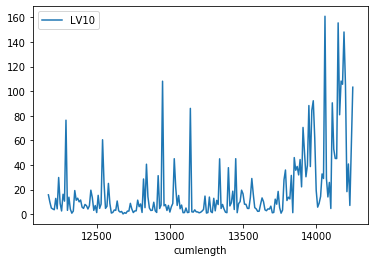

In [22]:
df[(df['SECTIONLABEL']=='CR1') & (df['roadcode']=='A5') & (df['cumlength'] > 12165) & (df['cumlength'] < 14255)].plot(x='cumlength',y='LV10')

In [12]:
df.columns[7:49]

Index(['LLRT', 'LRRT', 'LLTX', 'LSPD', 'LGRD', 'LFAL', 'LCRV', 'LV3', 'LV10',
       'LTRC', 'LWCL', 'LWCR', 'LEDC', 'LEDR', 'LES1', 'LES2', 'LTAD', 'LTRV',
       'LLAD', 'LRAD', 'LLRD', 'LRRD', 'LLTD', 'LLTM', 'LLTV', 'LCTM', 'LCTV',
       'LRTM', 'LRTV', 'LT05', 'LT95', 'LTVV', 'LL03', 'LL10', 'LLBI', 'LR03',
       'LR10', 'LRBI', 'LECR', 'LRCR', 'LSUR', 'LOVD'],
      dtype='object')

In [62]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

LABEL SNODE LENGTH   SDATE SECTIONLABEL STARTCH ENDCH  LLRT  LRRT  \
38830  A1_001.00           42  130519          CL1       0    10   4.1   2.1   
38842  A1_001.00           42  130519          CL1      10    20   3.9   1.1   
38844  A1_001.00           42  130519          CL1      20    30   4.4   3.2   
38846  A1_001.00           42  130519          CL1      30    40   3.3   2.9   
38848  A1_001.00           42  130519          CL1      40    42   1.0   1.6   

       LLTX  LSPD  LGRD  LFAL    LCRV   LV3   LV10  LTRC  LWCL  LWCR  LEDC  \
38830  0.90    19   2.2  -0.7   -7.65   8.7   48.6   0.0   0.0   0.0  27.7   
38842  0.52    22  -0.2  -0.9  -10.63  16.0  300.4   0.0   0.0   0.0  77.1   
38844  0.55    26  -1.9   0.4 -344.83  11.5  171.1   0.0   0.0   0.0  22.9   
38846  0.51    29   0.2   1.7   45.25   5.8  207.7   0.0   0.0   0.0  41.5   
38848  0.65    31   1.8   2.2   44.44   0.3    0.4   0.0   0.0   0.0   4.2   

        LEDR  LES1  LES2     LTAD   LTRV     LLAD     LRAD  LLRD  LRRD  LLTD  \
38830  0.062   0.0   0.0  0.01005  -8.22  0.00798  0.00867   5.1   2.2  1.12   
38842  0.062   9.3   0.0  0.01268  29.84  0.01860  0.00522  12.7   2.5  0.75   
38844  0.077  10.2   0.0  0.01487   6.44  0.00990  0.00851   5.9   4.0  0.77   
38846  0.035   0.0   0.0  0.00798   5.89  0.00739  0.00533   2.6   3.0  0.68   
38848  0.000   0.0   0.0  0.00499   2.02  0.00348  0.00301   1.0   1.6  0.81   

       LLTM  LLTV  LCTM  LCTV  LRTM  LRTV  LT05  LT95  LTVV  LL03   LL10  \
38830  0.61  0.08  0.56  0.02  0.60  0.03   0.3   0.9  0.04  6.68  14.86   
38842  0.40  0.03  0.40  0.02  0.53  0.03   0.2   0.7  0.03  5.06  87.04   
38844  0.43  0.04  0.26  0.02  0.35  0.03   0.1   0.7  0.03  2.65  58.70   
38846  0.39  0.02  0.42  0.02  0.40  0.02   0.2   0.6  0.02  1.74  13.30   
38848  0.51  0.02  0.48  0.01  0.53  0.02   0.3   0.7  0.02  0.12   9.31   

       LLBI  LR03   LR10  LRBI  LECR  LRCR  LSUR  LOVD       LCOOx  \
38830     1  1.34  15.29     0   0.0   0.0   0.0   0.0  238361.759   
38842     0  0.77   2.37     0   0.0   0.0   0.0   0.0  238351.483   
38844     0  3.76  42.34     0   0.0   0.0   0.0   0.0  238345.139   
38846     0  1.03   8.37     0   0.0   0.0   0.0   0.0  238337.450   
38848     0  0.06   7.68     0   0.0   0.0   0.0   0.0  238335.643   

            LCOOy  LCOOz  nancount  startch  endch  crackcount  crackmagsum  \
38830  475304.673  5.720         0        0     10          10        3.544   
38842  475309.704  5.647         0       10     20           0        0.000   
38844  475319.906  5.424         0       20     30           0        0.000   
38846  475328.671  5.282         0       30     40           0        0.000   
38848  475330.166  5.297         0       40     42           0        0.000   

       EDATE         RCI hierarchy roadcode  roadsection  split_lens  \
38830    NaN   62.666667   Primary       A1          1.0          10   
38842    NaN  120.000000   Primary       A1          1.0          10   
38844    NaN  112.500000   Primary       A1          1.0          10   
38846    NaN  122.500000   Primary       A1          1.0          10   
38848    NaN   12.500000   Primary       A1          1.0           2   

       cumlength         X1        Y1  
38830         10  54.148060 -4.476348  
38842         20  54.148102 -4.476508  
38844         30  54.148191 -4.476610  
38846         40  54.148268 -4.476733  
38848         42  54.148280 -4.476761

In [112]:
df[df['roadcode']=='C741']

LABEL SNODE LENGTH   SDATE SECTIONLABEL  STARTCH  ENDCH  LLRT  \
125153  C741_001.00          481  210519          CR1        0      1   5.9   
34959   C741_001.00          481  210519          CR1        0      1   5.9   
125155  C741_001.00          481  210519          CR1        1     11   5.2   
34961   C741_001.00          481  210519          CR1        1     11   5.2   
125157  C741_001.00          481  210519          CR1       11     21   1.6   
34963   C741_001.00          481  210519          CR1       11     21   1.6   
125159  C741_001.00          481  210519          CR1       21     31   0.8   
34965   C741_001.00          481  210519          CR1       21     31   0.8   
125161  C741_001.00          481  210519          CR1       31     41   0.4   
34967   C741_001.00          481  210519          CR1       31     41   0.4   
125163  C741_001.00          481  210519          CR1       41     51   0.1   
34969   C741_001.00          481  210519          CR1       41     51   0.1   
125165  C741_001.00          481  210519          CR1       51     61   0.0   
34971   C741_001.00          481  210519          CR1       51     61   0.0   
125167  C741_001.00          481  210519          CR1       61     71   0.3   
34973   C741_001.00          481  210519          CR1       61     71   0.3   
125169  C741_001.00          481  210519          CR1       71     81   0.4   
34975   C741_001.00          481  210519          CR1       71     81   0.4   
125171  C741_001.00          481  210519          CR1       81     91   0.4   
34977   C741_001.00          481  210519          CR1       81     91   0.4   
125173  C741_001.00          481  210519          CR1       91    101   1.2   
34979   C741_001.00          481  210519          CR1       91    101   1.2   
125175  C741_001.00          481  210519          CR1      101    111   0.5   
34981   C741_001.00          481  210519          CR1      101    111   0.5   
125177  C741_001.00          481  210519          CR1      111    121   0.6   
34983   C741_001.00          481  210519          CR1      111    121   0.6   
125179  C741_001.00          481  210519          CR1      121    131   0.6   
34985   C741_001.00          481  210519          CR1      121    131   0.6   
125181  C741_001.00          481  210519          CR1      131    141   0.8   
34987   C741_001.00          481  210519          CR1      131    141   0.8   
125183  C741_001.00          481  210519          CR1      141    151   1.1   
34989   C741_001.00          481  210519          CR1      141    151   1.1   
125185  C741_001.00          481  210519          CR1      151    161   1.3   
34991   C741_001.00          481  210519          CR1      151    161   1.3   
125187  C741_001.00          481  210519          CR1      161    171   1.3   
34993   C741_001.00          481  210519          CR1      161    171   1.3   
125189  C741_001.00          481  210519          CR1      171    181   1.1   
34995   C741_001.00          481  210519          CR1      171    181   1.1   
125191  C741_001.00          481  210519          CR1      181    191   0.7   
34997   C741_001.00          481  210519          CR1      181    191   0.7   
125193  C741_001.00          481  210519          CR1      191    201   0.6   
34999   C741_001.00          481  210519          CR1      191    201   0.6   
125195  C741_001.00          481  210519          CR1      201    211   0.8   
35001   C741_001.00          481  210519          CR1      201    211   0.8   
125197  C741_001.00          481  210519          CR1      211    221   0.9   
35003   C741_001.00          481  210519          CR1      211    221   0.9   
125199  C741_001.00          481  210519          CR1      221    231   0.9   
35005   C741_001.00          481  210519          CR1      221    231   0.9   
125201  C741_001.00          481  210519          CR1      231    241   0.8   
35007   C741_001.00          481  210519          CR1      231  

In [16]:



#dates = pd.date_range("1.1.2019", "2.28.2019")
#np.random.seed(999)
#Y = np.random.normal(0.5, 0.1, len(dates))
#features = [choice(["a", "b",]) for i in range(len(dates))]
#df = pd.DataFrame({"dates": dates, "Y": Y, "features": features})
df = df[df['roadcode']=='A10']

base = alt.Chart(df)
area_args = {"opacity": 0.3, "interpolate": "step"}
pts = alt.selection(type="interval", encodings=["x","y"])
points = (
    base.mark_circle()
    .encode(alt.X("LCOOx:Q", scale=alt.Scale(zero=False)), alt.Y("LCOOy:Q", scale=alt.Scale(zero=False)), color="SECTIONLABEL:N")
    .add_selection(pts)
)

#yscale = alt.Scale(domain=(0, 1))
#right_hist = (
#    base.mark_area(**area_args)
#    .encode(
#        alt.Y(
#            "Y:Q", bin=alt.Bin(maxbins=20, extent=yscale.domain), stack=None, title=""
#        ),
#        alt.X("count()", stack=None, title=""),
#        alt.Color("RCI:N"),
#    )
#    .transform_filter(pts)
#)

points

alt.Chart(...)

In [18]:
pts

Selection('selector008', SelectionDef({
  encodings: ['x', 'y'],
  type: 'interval'
}))